In [25]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import nets
import pipeline
import importlib
importlib.reload(pipeline)
importlib.reload(nets)

<module 'nets' from '/content/nets.py'>

In [26]:
start_width = 1
end_width = 21
train_size = 5000
test_size = 5000
epochs = 600

models = {}
for i in range(start_width, end_width + 1):
  models[i] = pipeline.CifarModel()
  models[i].load_net(nets.CNN(c = i))
  models[i].load_data(train_size = train_size, test_size = test_size)

Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified


Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
OSError: [Errno 9] Bad file descriptor
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 230, in _feed
    close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 5000 train, 5000 test.
Files alread

In [27]:
import datetime

train_errors = []
test_errors = []
aucs = []
for width, model in models.items():
  print(datetime.datetime.now())
  model.train(nn.CrossEntropyLoss(), epochs = epochs, verbose = False)
  train_errors.append(model.train_error())
  test_errors.append(model.test_error())
  aucs.append(model.auc(big=True))
  print('Model(width={0})'.format(width))
  print({'train_errors': train_errors, 'test_errors': test_errors, 'aucs': aucs})
  print()

2019-12-15 08:11:11.809171
Finished Training
Model(width=1)
{'train_errors': [0.6208], 'test_errors': [0.6258], 'aucs': [0.51034672]}

2019-12-15 08:23:48.553528
Finished Training
Model(width=2)
{'train_errors': [0.6208, 0.4568], 'test_errors': [0.6258, 0.501], 'aucs': [0.51034672, 0.47873104]}

2019-12-15 08:36:30.105023
Finished Training
Model(width=3)
{'train_errors': [0.6208, 0.4568, 0.364], 'test_errors': [0.6258, 0.501, 0.43999999999999995], 'aucs': [0.51034672, 0.47873104, 0.5076160599999999]}

2019-12-15 08:49:16.077432
Finished Training
Model(width=4)
{'train_errors': [0.6208, 0.4568, 0.364, 0.27980000000000005], 'test_errors': [0.6258, 0.501, 0.43999999999999995, 0.4072], 'aucs': [0.51034672, 0.47873104, 0.5076160599999999, 0.52559944]}

2019-12-15 09:01:47.456773
Finished Training
Model(width=5)
{'train_errors': [0.6208, 0.4568, 0.364, 0.27980000000000005, 0.2298], 'test_errors': [0.6258, 0.501, 0.43999999999999995, 0.4072, 0.4104], 'aucs': [0.51034672, 0.47873104, 0.5076160

In [28]:
widths = list(models.keys())
train_errors = [models[key].train_error() for key in widths]
test_errors = [models[key].test_error() for key in widths]
aucs = [models[key].auc(big = True) for key in widths]
print(widths)
print(train_errors)
print(test_errors)
print(aucs)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[0.627, 0.46399999999999997, 0.37160000000000004, 0.29600000000000004, 0.27080000000000004, 0.20020000000000004, 0.138, 0.11380000000000001, 0.07140000000000002, 0.06599999999999995, 0.04300000000000004, 0.030200000000000005, 0.022800000000000042, 0.015800000000000036, 0.010399999999999965, 0.014800000000000035, 0.009399999999999964, 0.0031999999999999806, 0.0043999999999999595, 0.03259999999999996, 0.00019999999999997797]
[0.6262, 0.4962, 0.4262, 0.39380000000000004, 0.3974, 0.3778, 0.3668, 0.35419999999999996, 0.34440000000000004, 0.33399999999999996, 0.3264, 0.32299999999999995, 0.3296, 0.31599999999999995, 0.31020000000000003, 0.3214, 0.29359999999999997, 0.2884, 0.27659999999999996, 0.3046, 0.27959999999999996]
[0.51034672, 0.47873104, 0.5076160599999999, 0.52559944, 0.52877372, 0.5524650200000001, 0.55517682, 0.57677026, 0.58385162, 0.59247792, 0.6088324, 0.6167967200000001, 0.63494176, 0.63137244, 0.6283

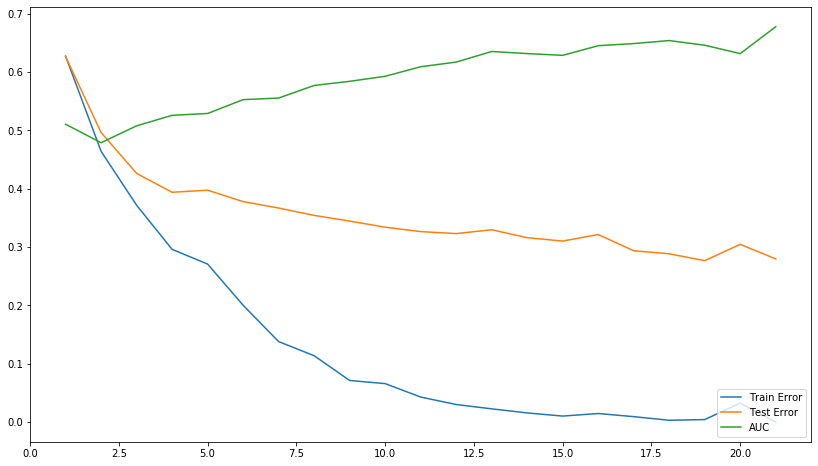

In [29]:
plt.figure(figsize=(14,8))
plt.plot(widths, train_errors, label = 'Train Error')
plt.plot(widths, test_errors, label = 'Test Error')
plt.plot(widths, aucs, label = 'AUC')
plt.legend(loc = 'lower right')
plt.show()